# Project: Predicting Heart Disease using Logistic Regression

## Objective:
To predict whether a patient has heart disease based on age, gender, cholesterol, and blood pressure using logistic regression.

## Step 1: Import Libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Step 2: Load and Explore Dataset

We load the heart disease dataset and inspect its structure.

In [16]:
# Load dataset
df = pd.read_csv("heart_disease.csv")

# Show first few rows
df.head()

,Age\tGender\tCholesterol\tBlood Pressure\tHeart Disease
0,30\tFemale\t271\t128\t1
1,33\tFemale\t220\t158\t1
2,33\tMale\t181\t100\t0
3,69\tMale\t163\t163\t0
4,39\tMale\t221\t116\t1


## Step 3: Data Cleaning

We check for missing values or duplicates and handle them appropriately.

In [17]:
# Check for null values
print(df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

Age\tGender\tCholesterol\tBlood Pressure\tHeart Disease    0
dtype: int64


## Step 4: Feature Engineering

We scale the features and encode categorical variables like Gender.

In [18]:
# Reload the dataframe with correct separator if needed
if df.shape[1] == 1 and '\t' in df.columns[0]:
    df = pd.read_csv("heart_disease.csv", sep='\t')

# Encode Gender column if it's text
if df['Gender'].dtype == 'object':
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])

# Separate features and target
X = df[['Age', 'Gender', 'Cholesterol', 'Blood Pressure']]
y = df['Heart Disease']  # 1 = has disease, 0 = no disease

# Normalize/scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Step 5: Train-Test Split

We split the data into training (80%) and testing (20%) sets.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

## Step 6: Model Training

We use Logistic Regression to train a binary classification model.

In [20]:
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Step 7: Model Evaluation

We evaluate model performance using accuracy, precision, recall, F1-score, and a confusion matrix.

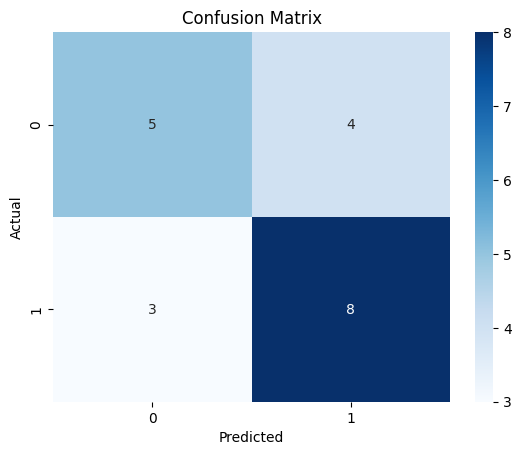

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.67      0.73      0.70        11

    accuracy                           0.65        20
   macro avg       0.65      0.64      0.64        20
weighted avg       0.65      0.65      0.65        20

Accuracy: 0.65


In [21]:
# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


## Summary

- Logistic Regression was used to predict heart disease based on 4 features.
- Model evaluation shows metrics like accuracy, precision, and recall.

In [22]:
print(df['Heart Disease'].value_counts())


Heart Disease
1    51
0    49
Name: count, dtype: int64
